In [1]:
# 50K, <=50K gelir tahmini yapmaya çalışıyoruz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("14-income_evaluation.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info() #kolon isimleri önlerinde boşluk var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
col_names = ["age","workclass","finalweightt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

In [7]:
df.columns = col_names

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweightt    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,finalweightt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age               0
workclass         0
finalweightt      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
for col in df.columns:#sadece kategorik değerleri alalım
    if df[col].dtype=="O":
        print(col)

workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


In [12]:
#veya 
categorical = [col for col in df.columns if df[col].dtype =="O"]
numerical = [col for col in df.columns if df[col].dtype !="O"]

In [13]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [14]:
numerical

['age',
 'finalweightt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [15]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [16]:
for col in categorical:
    print(df[col].value_counts())  # ? ile doldurulan veriler boştur diye düşünüyorum

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [17]:
#baya data var bazıları birleştirilebilir 

In [18]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [19]:
#EDA 

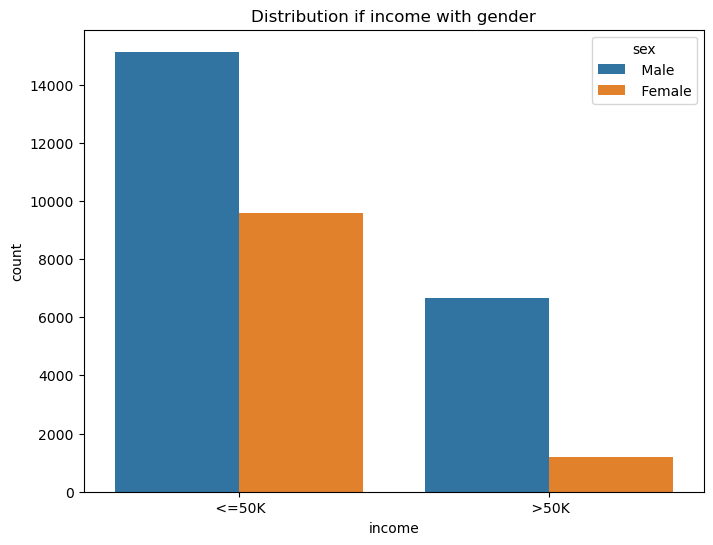

In [20]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Distribution if income with gender")
plt.show()

In [21]:
#erkekler daha baskın görünüyor 

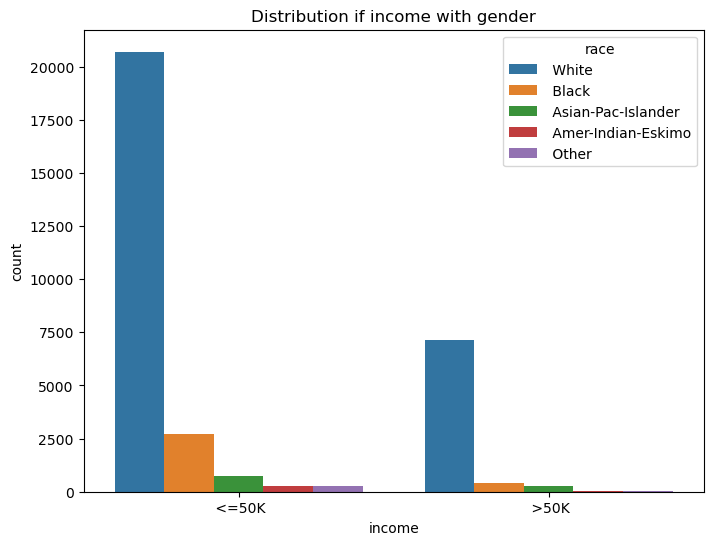

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x="income", hue="race", data=df)  #ırka göre değişime bakalım
ax.set_title("Distribution if income with gender")
plt.show()

In [23]:
df.head()

,age,workclass,finalweightt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


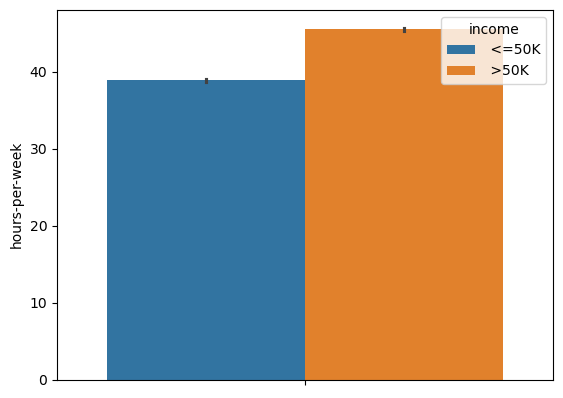

In [24]:
sns.barplot(y=df["hours-per-week"], hue=df["income"])  
plt.show()

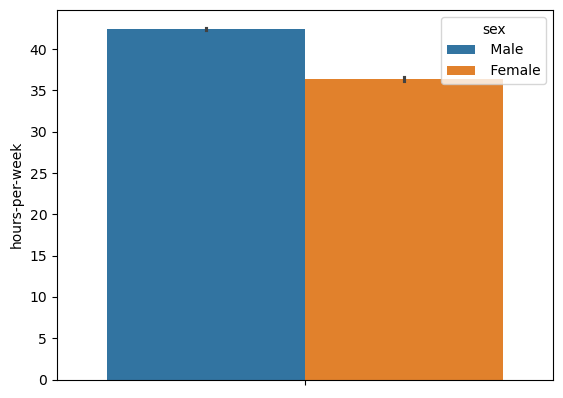

In [25]:
sns.barplot(y=df["hours-per-week"], hue=df["sex"])  
plt.show()

In [26]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [27]:
df["workclass"].value_counts()  # 1836 ? datasını none yapalım

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [29]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [30]:
df["education"].value_counts()  # ? yok

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [31]:
df["marital-status"].value_counts() # ? yok

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [32]:
df["occupation"].value_counts() # ? var

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [33]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [34]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [35]:
df["relationship"].value_counts() # ? yok

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [36]:
df["race"].value_counts() # ? yok

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [37]:
df["sex"].value_counts() # ? yok

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [38]:
df["native-country"].value_counts() # ? var

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [39]:
df["native-country"] = df["native-country"].replace(" ?", np.nan)

In [40]:
df["native-country"].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [41]:
df["income"].value_counts() # ? yok

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [42]:
df.isnull().sum()

age                  0
workclass         1836
finalweightt         0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

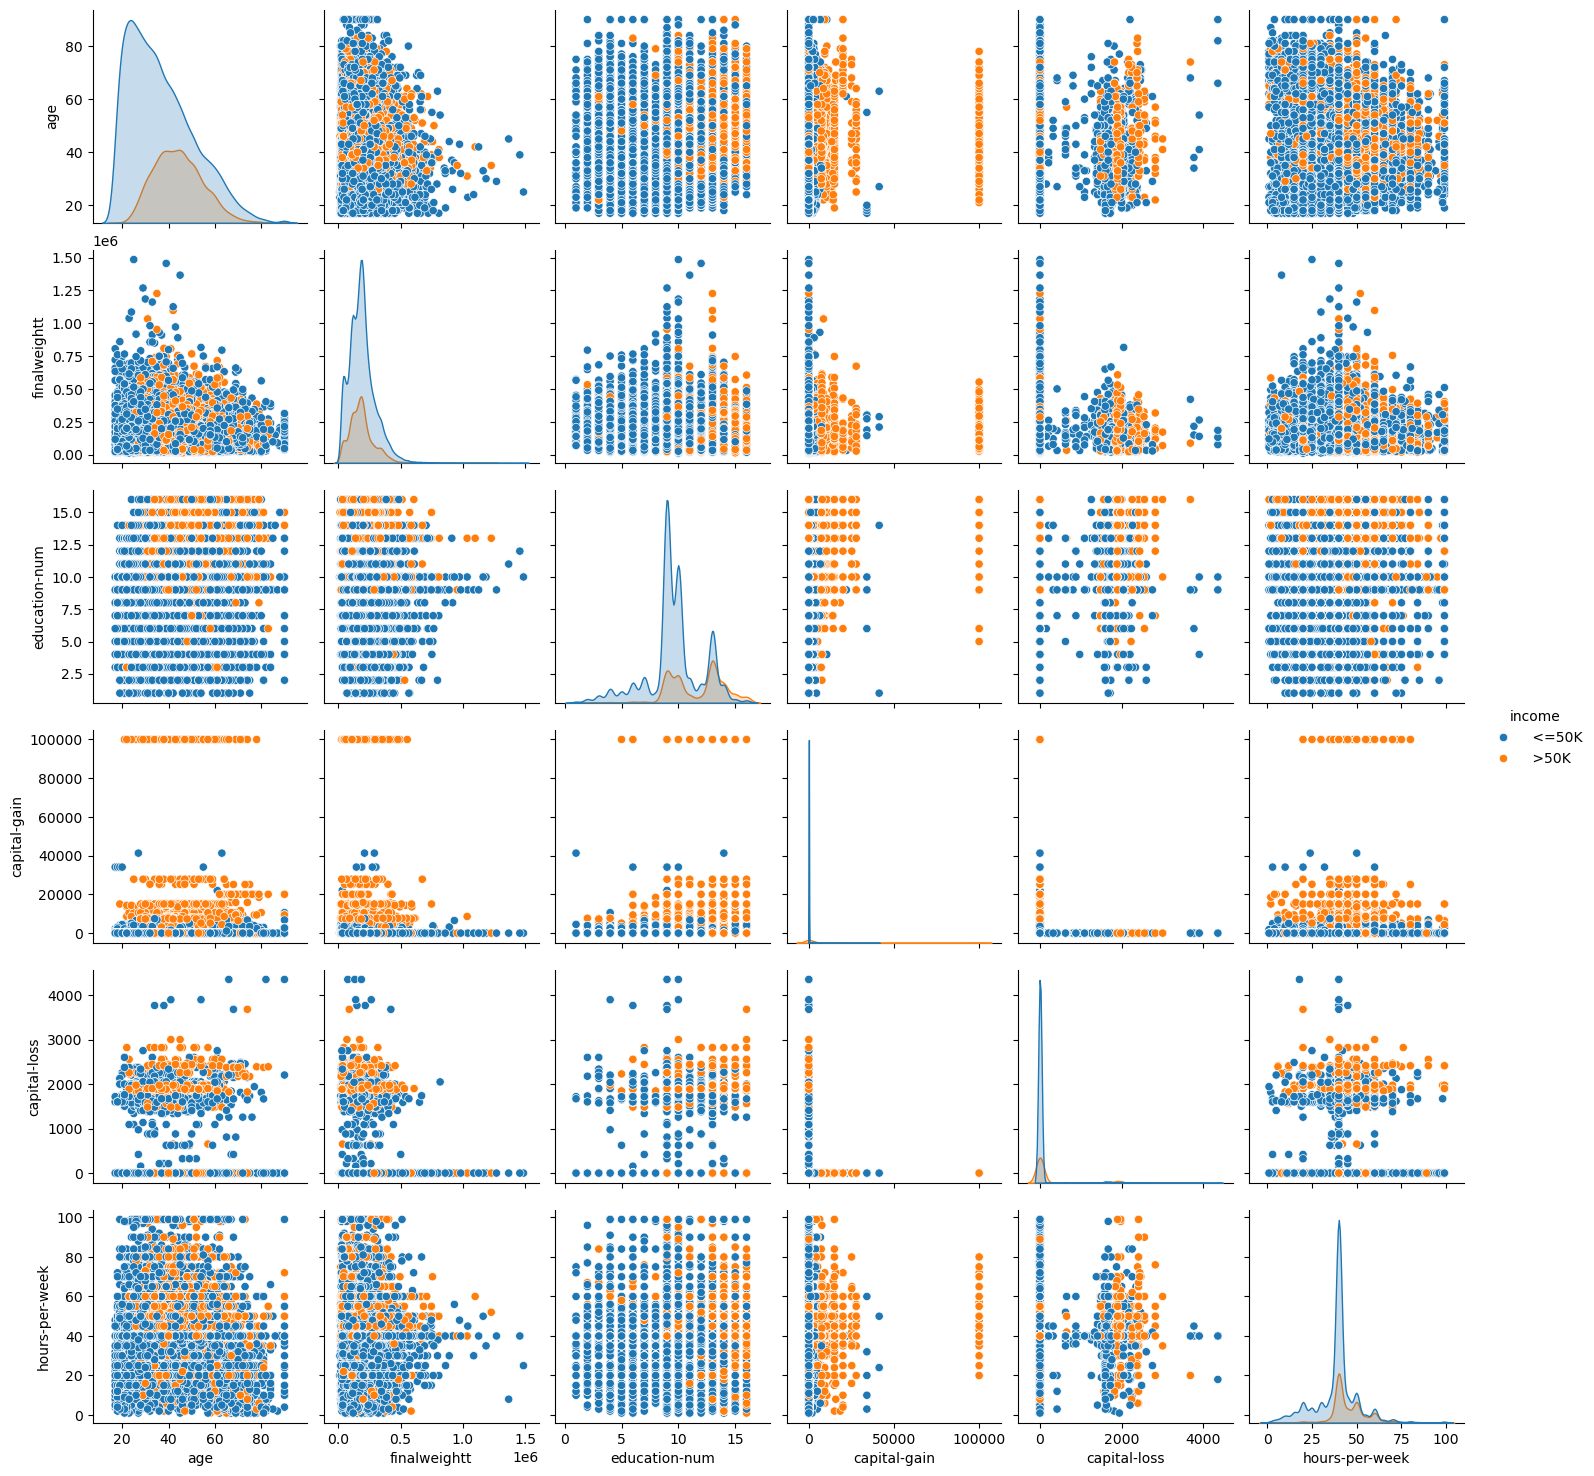

In [43]:
sns.pairplot(df, hue="income")
plt.show()

In [44]:
X = df.drop("income", axis=1)
y = df["income"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [47]:
X_train[categorical]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany
...,...,...,...,...,...,...,...,...
13123,Local-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
19648,Private,10th,Never-married,Farming-fishing,Unmarried,White,Male,United-States
9845,Private,Some-college,Separated,Sales,Own-child,White,Female,United-States
10799,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [48]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital-status       0
occupation        1278
relationship         0
race                 0
sex                  0
native-country     414
dtype: int64

In [49]:
X_test[categorical].isnull().sum()

workclass         560
education           0
marital-status      0
occupation        565
relationship        0
race                0
sex                 0
native-country    169
dtype: int64

In [50]:
# boş yerleri mod ile dolduralım
#imputing

In [51]:
for i in [X_train, X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native-country"] = i["native-country"].fillna(X_train["native-country"].mode()[0])

In [52]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [53]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [54]:
#encoding

In [55]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [56]:
df[categorical].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [57]:
y_train

32098      >50K
25206     <=50K
23491      >50K
12367     <=50K
7054      <=50K
          ...  
13123      >50K
19648     <=50K
9845      <=50K
10799      >50K
2732      <=50K
Name: income, Length: 22792, dtype: object

In [58]:
y_train_binary = y_train.apply(lambda x:1 if x.strip() == ">50K" else 0)

In [59]:
y_train_binary

32098    1
25206    0
23491    1
12367    0
7054     0
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: income, Length: 22792, dtype: int64

In [60]:
#target encoding

target_means = y_train_binary.groupby(X_train["native-country"]).mean() # bu 0 1 leri native country ye göre gruplandırıp ortalamasını alalım

In [61]:
X_train["native-country_encoded"] = X_train["native-country"].map(target_means) #country leri eşleştirip yerine bulduğumuz değerleri koyucak
X_train["native-country_encoded"] = X_train["native-country_encoded"].fillna(y_train_binary.mean()) #eğer boş kalırsa bi yerler ortalamayla doldur

X_test["native-country_encoded"] = X_test["native-country"].map(target_means) #aynısını x_
X_test["native-country_encoded"] = X_test["native-country_encoded"].fillna(y_train_binary.mean())

In [62]:
X_train.head() #artık native country ye ihtiyacımız yok drop edelim

,age,workclass,finalweightt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,native-country_encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [63]:
X_train = X_train.drop("native-country", axis=1)
X_test = X_test.drop("native-country", axis=1)

In [64]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [65]:
#native_country dışındakilere one hot encoding yapıcaz

In [66]:
one_hot_categories = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
encoder = ColumnTransformer(   #liste içinde tuple lar olarak yazılıyordu
    transformers=[
        ('cat', OneHotEncoder(handle_unknown="ignore", sparse_output=False),one_hot_categories)  #cat=transformera vermemiz gereken herhangi bir isim
    ], remainder="passthrough"                                                                   #bilinmeyen kolonu ignore etmesini yani pas geçmesini söyledik
                                                                                                 #X_traini sparse matrix olarak oluşturur normalde bunu istemiyoruz
)                                                                                                #sonrasında tuple a hangi kategorilerin transformer içine dahil edileceğini verdik
                                                                                                 #sonrasında column transformers içine remainder vermemiz gerekiyordu
                                                                                                 #diğer kolonları ellemesin diye
#encoder ı bu şekilde oluşturabiliriz

In [69]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [70]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]])

In [71]:
#one hot encodingde bütün kolonlara yeni isim koyuyo eski isimlere ihtiyaç olabilir
#o yüzden bu şekilde onları alabiliriz

In [72]:
columns = encoder.get_feature_names_out()

In [73]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital-status_ Divorced',
       'cat__marital-status_ Married-AF-spouse',
       'cat__marital-status_ Married-civ-spouse',
       'cat__marital-status_ Married-spouse-absent',
       'cat__marital-status_ Never-mar

In [77]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [79]:
X_train #dataframe şeklinde çok daha anlaşılır gözüküyor ama bu adımı yapmayadabilirdik

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweightt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [80]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweightt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country_encoded
22278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,177119.0,10.0,0.0,0.0,44.0,0.245722
8950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,216481.0,13.0,0.0,0.0,40.0,0.245722
7838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,256263.0,12.0,0.0,0.0,40.0,0.245722
16505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,147640.0,3.0,0.0,1902.0,40.0,0.245722
19140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,45.0,172822.0,7.0,0.0,2824.0,76.0,0.245722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,192963.0,13.0,0.0,2415.0,35.0,0.328000
26405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,388594.0,15.0,15024.0,0.0,45.0,0.245722
23236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54.0,304570.0,13.0,7688.0,0.0,40.0,0.245722
26823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,36.0,90159.0,10.0,0.0,0.0,40.0,0.245722


In [81]:
cols = X_train.columns

In [84]:
#scalinge burda gerek yok ama yine de yapalım
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [85]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  #bu işemden sonra numpy dizisine geri dönecek X_train ve X_test

In [87]:
X_train  #yine istersek çevirebiliriz

array([[ 0. ,  0. ,  0. , ...,  0. ,  4. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.4,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1.6,  0. ]])

In [88]:
X_train = pd.DataFrame(X_train, columns = cols)

In [89]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweightt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.000000
1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,-0.204055
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,-1.210980,1.333333,0.0,0.0,0.0,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.35,-0.665391,-1.333333,0.0,0.0,-1.0,0.000000
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.70,-1.110582,0.000000,0.0,0.0,0.0,0.000000
22790,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.317951,2.000000,7688.0,0.0,1.0,0.000000


In [90]:
X_test = pd.DataFrame(X_test, columns = cols)

In [91]:
#training
#zor bir dataset bakalım accuracy nereye çıkacak

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15) #10 ağaçla denemeye başlayalım
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [95]:
y_pred = rfc.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))  #0.84 le gayet iyi başlamışız kaggle da buldukları skorlar en iyi bu civarlarda

0.8470672535571706
              precision    recall  f1-score   support

       <=50K       0.93      0.88      0.90      7859
        >50K       0.59      0.73      0.65      1910

    accuracy                           0.85      9769
   macro avg       0.76      0.80      0.78      9769
weighted avg       0.86      0.85      0.85      9769

[[6886  973]
 [ 521 1389]]


In [99]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15) #10 ağaçla denemeye başlayalım
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8537209540382844
              precision    recall  f1-score   support

       <=50K       0.93      0.89      0.91      7762
        >50K       0.62      0.73      0.67      2007

    accuracy                           0.85      9769
   macro avg       0.77      0.81      0.79      9769
weighted avg       0.86      0.85      0.86      9769

[[6870  892]
 [ 537 1470]]


In [100]:
#iyileştirme için manuel olarak en önemsiz kolonlar çıkarılabilir
#önem sırasını şu şekilde bulabiliriz

In [102]:
feature_score = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [104]:
feature_score #en alttakiler en önemsiz

remainder__finalweightt             0.159946
remainder__age                      0.148629
remainder__capital-gain             0.095961
remainder__hours-per-week           0.084592
remainder__education-num            0.071245
                                      ...   
cat__occupation_ Priv-house-serv    0.000097
cat__workclass_ Without-pay         0.000075
cat__education_ Preschool           0.000029
cat__occupation_ Armed-Forces       0.000023
cat__workclass_ Never-worked        0.000007
Length: 65, dtype: float64

In [106]:
feature_score.tail(10) #bunları atmayı deneyelim

cat__education_ 12th                      0.000844
cat__race_ Other                          0.000837
cat__education_ 5th-6th                   0.000353
cat__marital-status_ Married-AF-spouse    0.000285
cat__education_ 1st-4th                   0.000250
cat__occupation_ Priv-house-serv          0.000097
cat__workclass_ Without-pay               0.000075
cat__education_ Preschool                 0.000029
cat__occupation_ Armed-Forces             0.000023
cat__workclass_ Never-worked              0.000007
dtype: float64

In [107]:
X_train = X_train.drop(["cat__education_ 12th", "cat__race_ Other", "cat__education_ 5th-6th", "cat__marital-status_ Married-AF-spouse",
                       "cat__education_ 1st-4th", "cat__occupation_ Priv-house-serv", "cat__workclass_ Without-pay", "cat__education_ Preschool",
                       "cat__occupation_ Armed-Forces", "cat__workclass_ Never-worked"], axis=1)

In [108]:
X_test = X_test.drop(["cat__education_ 12th", "cat__race_ Other", "cat__education_ 5th-6th", "cat__marital-status_ Married-AF-spouse",
                       "cat__education_ 1st-4th", "cat__occupation_ Priv-house-serv", "cat__workclass_ Without-pay", "cat__education_ Preschool",
                       "cat__occupation_ Armed-Forces", "cat__workclass_ Never-worked"], axis=1)

In [109]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15) #10 ağaçla denemeye başlayalım
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.853618589415498
              precision    recall  f1-score   support

       <=50K       0.93      0.89      0.91      7751
        >50K       0.62      0.73      0.67      2018

    accuracy                           0.85      9769
   macro avg       0.78      0.81      0.79      9769
weighted avg       0.86      0.85      0.86      9769

[[6864  887]
 [ 543 1475]]


In [111]:
#çok bişey değiştirmedi 
#bunu yapacağına hyperparameter tuning yapalım

In [112]:
#hyperparameter tuning

In [115]:
rf_params = {
    "n_estimators" : [100,200,500,1000],
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt", "log2", 5,6,7,8],
    "min_samples_split" : [2,8,15,20]
}

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rfc=RandomForestClassifier()

In [120]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params, cv=3, n_jobs=-1)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 6,
                                                         7, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [121]:
y_pred = rscv.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8630361347118436
              precision    recall  f1-score   support

       <=50K       0.94      0.89      0.91      7813
        >50K       0.63      0.76      0.69      1956

    accuracy                           0.86      9769
   macro avg       0.78      0.83      0.80      9769
weighted avg       0.88      0.86      0.87      9769

[[6941  872]
 [ 466 1490]]
